In [3]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

# Reading and Loading Images

- Read the image
- Processing it
- Showing it
- Saving it

In [4]:
image = cv.imread("./gotham.jpg")
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv.imshow("Color tiger", image)
cv.imshow("Gray tiger", gray_image)
cv.imwrite("./gotham_gray.jpg", gray_image)
cv.waitKey(0)
cv.destroyAllWindows()

## Working with a Histogram Representation

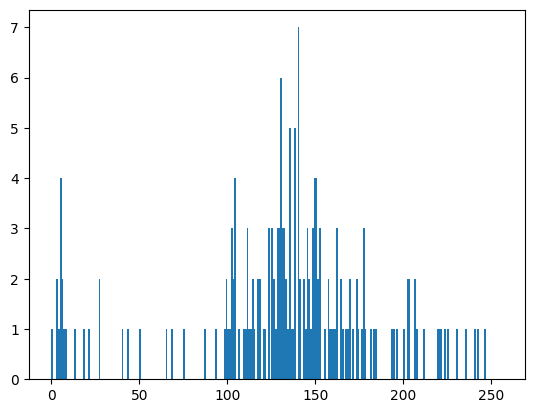

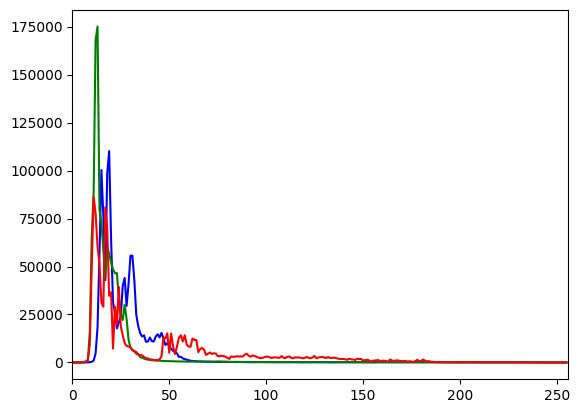

In [5]:
image = cv.imread("./gotham.jpg")

# plot a histogram
histogram_image = cv.calcHist([image], [0], None, [256], [0, 256])

# flaten the histogram
plt.hist(histogram_image.ravel(), 256, [0, 256])
plt.show()

# view color channels
color = ['b', 'g', 'r']

# seperate the colors and plot the histogram
for I, col in enumerate(color):
    hist = cv.calcHist([image], [I], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])

plt.show()

# Accessing and Manipulating Pixels

In [6]:
# read the image
gotham_image = cv.imread("./gotham.jpg")

# access a specific pixel using the coordinate based access from the matrix
pixel = gotham_image[200, 250]

#see what color space this pixel represents - this is an RBG representation
print(pixel)

# change the pixel color
gotham_image[200, 250] = (0, 255, 0)

# change the pixel color in a region range as against
gotham_image[200:250, 200:350] = (0, 255, 0)

cv.imshow("one pixel",gotham_image)
cv.waitKey(0)
cv.destroyAllWindows()


[18 13 22]


# Shapes

In [7]:
gotham_image = cv.imread("./gotham.jpg")

cv.line(gotham_image, (26, 22), (200, 200), (0, 0, 255), 2)
cv.rectangle(gotham_image, (26, 22), (200, 200), (0, 0, 255), 2)
cv.circle(gotham_image, (113, 111), 50, (0, 0, 255), 1)
cv.line(gotham_image, (26 ,200), (200, 26), (0, 0, 255), 2)

cv.imshow("gotham", gotham_image)
cv.waitKey(0)
cv.destroyAllWindows()

# Filtering Images

In [8]:
# blurring
gotham_image = cv.imread("./gotham.jpg")

noiseReduced_version = cv.medianBlur(gotham_image, 3)

cv.imshow("Original", gotham_image)
cv.imshow("Blurred", noiseReduced_version)

cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
# Translation
gotham_image = cv.imread("./gotham.jpg")

num_row, num_cols = gotham_image.shape[:2]

translation_matrix = np.float32([ [1, 0, 70], [0, 1, 110] ])
image_translation = cv.warpAffine(gotham_image, translation_matrix, (num_cols, num_row))

cv.imshow("Translation", image_translation)

cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
# Rotation
gotham_image = cv.imread("./gotham.jpg")

num_row, num_cols = gotham_image.shape[:2]

rotation_matrix = cv.getRotationMatrix2D((.5*num_cols, .5*num_row), 20, .73)
image_rotation = cv.warpAffine(gotham_image, rotation_matrix, (num_cols, num_row))

cv.imshow("Rotation", image_rotation)

cv.waitKey(0)
cv.destroyAllWindows()

In [15]:
# Scalling
gotham_image = cv.imread("./gotham.jpg")

scale1 = cv.resize(gotham_image, None, fx=1.2, fy=1.2, interpolation=cv.INTER_LINEAR)
cv.imshow('Scaling - Linear Interpolation', scale1)

scale2 = cv.resize(gotham_image, None, fx=1.2, fy=1.2, interpolation=cv.INTER_CUBIC)
cv.imshow('Scaling - Cubic Interpolation', scale2)

scale3 = cv.resize(gotham_image, (450, 400), interpolation=cv.INTER_AREA)
cv.imshow("Scaling - Skewed Size", scale3)



cv.waitKey(0)
cv.destroyAllWindows()

# Edge Detection

In [27]:
gotham_image = cv.imread("./gotham.jpg")

edges = cv.Canny(gotham_image, 100, 200)

cv.imshow("Edges", edges)
cv.waitKey(0)
cv.destroyAllWindows()

# Image Segmentation

In [35]:
gotham_image = cv.imread("./gotham.jpg")

gray = cv.cvtColor(gotham_image, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 100, 200)

cv.imshow("original",gray)
cv.imshow("Edges", edges)
cv.waitKey(0)
cv.destroyAllWindows()

contours, hierarchy = cv.findContours(edges.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
print("Number of contours found = ", len(contours))

cv.drawContours(gotham_image, contours, -1, (0, 255, 0), 1)
cv.imshow("All contours", gotham_image)
cv.waitKey(0)

Number of contours found =  454


-1